## Exercise 10.1 (search)

We want to find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function. To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

### Solution

We first create the list of random numbers

In [82]:
import numpy as np
x = np.random.rand(1000)

#### Approach 1

In [83]:
def min_max1(x):
    x_min = 1
    x_max = 0
    for i in x:
        if i < x_min:
            x_min = i
        if i > x_max:
            x_max = i
    return  x_min, x_max
    
print(min_max1(x))

(0.0011294424354344468, 0.9990276979311501)


#### Approach 2

In [84]:
def min_max2(x):
    x_min = np.min(x)
    x_max = np.max(x)
    return(x_min,x_max)

print(min_max2(x))

(0.0011294424354344468, 0.9990276979311501)


In [85]:
assert min_max1(x) == min_max2(x)

In practice, we would use the the NumPy function:

In [86]:
print(np.min(x), np.max(x))

0.0011294424354344468 0.9990276979311501


## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

### Task

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here
    
    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:
$$
f(x) = \tan(x) - 2x
$$
between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ on the same graph, 
and show the roots computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

### Solution

We first implement a Newton solver function:

In [87]:
import numpy as np

def newton(f, df, x, tol=1e-8, max_it=20):
    """Find root of equation defined by function f(x) where df(x) is
    first derivative and x is the initial guess.Optional arguments tol 
    (tolerance) and max_it (maximum number of iterations)"""
    
    xprev = 0
    iter = 0
    while abs(xprev-x) > tol and iter <= max_it:
        xprev = x
        x = -f(x)/df(x) + x
        # print(f'x = {x}')
        iter += 1
    return x

def f(x):
    fx = np.tan(x)-2*x
    return(fx)

def df(x):
    dx = 1e-9
    dfx = (f(x+dx)-f(x-dx))/(2*dx)
    return(dfx)

We now provide implementations of `f` and `df`, and find the roots:

In [88]:
def f(x):
    fx = np.tan(x)-2*x
    return(fx)

def df(x):
    dx = 1e-9
    dfx = (f(x+dx)-f(x-dx))/(2*dx)
    return(dfx)

In [89]:
print(newton(f, df, -1.2))
print(newton(f, df, 0.1))
print(newton(f, df, 1.2))

-1.1655611852072119
0.0
1.1655611852072119


We can visualise the result:

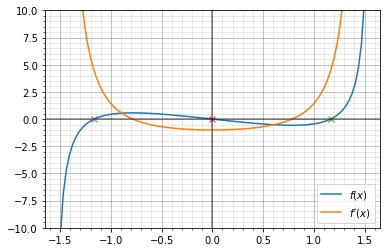

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot f and df/dx
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")
plt.plot(newton(f,df,1.2), 0, 'x')
plt.plot(newton(f,df,0), 0, 'x')
plt.plot(newton(f,df,-1.2), 0, 'x')
plt.legend()
# ---- AXES ---- #
plt.ylim(-10,10)
plt.axhline(y = 0, color = 'k', linestyle = '-', alpha=0.5) # X-AXIS
plt.axvline(x = 0, color = 'k', linestyle = '-', alpha=0.5) # Y-AXIS
# ---- FORMATTING ---- #
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.3) # MAJOR GRID
plt.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.1) # MINOR GRID
plt.minorticks_on()

plt.show()

In [91]:
# Find roots near -1.2, 0.1, and 1.2
xroots = np.array((newton(f, df, -1.2),
                   newton(f, df, 0.1),
                   newton(f, df, 1.2)))
assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

In practice, we could use the Newton function `scipy.optimize.newton` from SciPy (http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) rather than implementing our own function.

## Exercise 10.3 (optional, low pass image filter)

Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity. See http://matplotlib.org/users/image_tutorial.html for more background.

Below we fetch an image and display it:

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Import image
# Using new method
import PIL
import urllib.request
url = 'https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png'
img = PIL.Image.open(urllib.request.urlopen(url))

# Using Matplotlib
# url = 'https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png'
# img = mpimg.imread(url)

# Check type and shape
print(type(img))
print(f"Image array shape: {img.shape}")

# Display image
plt.imshow(img)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000223359AE6D0>

The task is to write a *function* that applies a particular low-pass filter algorithm to an image array 
and  returns the  filtered image. With this particular filter, the value of a pixel in the filtered image 
is equal to the average value of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, 
the neighbours are  `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()